- Working on creating a validation and test dataset

# Vision Transformers

In [ ]:
!pip install transformers datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 13.4 MB/s 
     |████████████████████████████████| 365 kB 37.6 MB/s 
     |████████████████████████████████| 6.6 MB 55.0 MB/s 
     |████████████████████████████████| 596 kB 23.5 MB/s 
     |████████████████████████████████| 101 kB 8.8 MB/s 
     |████████████████████████████████| 115 kB 41.0 MB/s 
     |████████████████████████████████| 141 kB 29.8 MB/s 
     |████████████████████████████████| 212 kB 49.9 MB/s 
     |████████████████████████████████| 127 kB 59.0 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


## Exploratory Data Analysis

### Datasets
Eurosat is a dataset and deep learning benchmark for land use and land cover classification. The dataset is based on Sentinel-2 satellite images covering 13 spectral bands and consisting out of 10 classes with in total 27,000 labeled and geo-referenced images.

Load the Eurosat dataset from here: https://madm.dfki.de/files/sentinel/EuroSAT.zip

(If you are not familiar with the datasets library, use this tutorial to help you: https://huggingface.co/docs/datasets/tutorial)

In [ ]:
# Load the dataset
# HINT: Try help(datasets.load_dataset)
import datasets

euro = ... # complete this

SyntaxError: ignored

In [ ]:
# Load the dataset

from datasets import load_dataset
e = load_dataset('imagefolder', 
                 data_files='https://madm.dfki.de/files/sentinel/EuroSAT.zip')
e

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset imagefolder downloaded and prepared to /root/.cache/huggingface/datasets/imagefolder/default-0537267e6f812d56/0.0.0/0fc50c79b681877cc46b23245a6ef5333d036f48db40d53765a68034bc48faff. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 27000
    })
})

#### Hint


Try help(datasets.load_dataset)

### View sample images

Datasets are very similar in structure to python dictionaries.


In [ ]:
#Display the first 5 images

#### Hint


Try help(display)

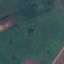

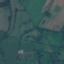

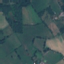

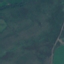

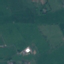

In [ ]:
for i in range(5):
  display(e['train'][i]['image'])

### Questions on dataset

- How many images are there in the dataset?
- What information is available with each sample of the dataset?
- How many train samples do we have?
- How many validation and test samples do we have?
- How many labels are there for this dataset? What are they?

In [ ]:
# Create a list, labels, that contains all the different label names
labels = ... # Complete this

In [ ]:
labels = e['train'].features['label'].names
labels

['AnnualCrop',
 'Forest',
 'HerbaceousVegetation',
 'Highway',
 'Industrial',
 'Pasture',
 'PermanentCrop',
 'Residential',
 'River',
 'SeaLake']

#### Hint:


In [ ]:
e['train'].features

### Creating a validation and test set

In [ ]:
e_train_test = e['train'].train_test_split(test_size=0.2)

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 21600
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 5400
    })
})

### Problem: Create a mapping between labels and IDs

Each of the numeric labels has an associated text description.

In [ ]:
# Create a mapping between the numeric label and the text description
id2label = ... # Complete this

In [ ]:
# Now do the reverse, create a mapping between the text description and the numeric label
label2id = ... # Complete this

#### Hint:

Consider using a dictionary comprehension

### Solution: Create a mapping between labels and IDs

In [ ]:
id2label = {key: value for key, value in enumerate(labels)}
id2label

{0: 'AnnualCrop',
 1: 'Forest',
 2: 'HerbaceousVegetation',
 3: 'Highway',
 4: 'Industrial',
 5: 'Pasture',
 6: 'PermanentCrop',
 7: 'Residential',
 8: 'River',
 9: 'SeaLake'}

In [ ]:
label2id = {value:key for key, value in enumerate(labels)}
label2id

{'AnnualCrop': 0,
 'Forest': 1,
 'HerbaceousVegetation': 2,
 'Highway': 3,
 'Industrial': 4,
 'Pasture': 5,
 'PermanentCrop': 6,
 'Residential': 7,
 'River': 8,
 'SeaLake': 9}

### Using a pre-trained model

When looking at text classification, we used a BERT model which is very similar to a Vision Transformer model. 

In [ ]:
#Select a relevant model
checkpoint = 'google/vit-base-patch16-224'

model = ... # complete this

In [ ]:
from transformers import AutoModelForImageClassification

checkpoint = 'google/vit-base-patch16-224'
model = AutoModelForImageClassification.from_pretrained(checkpoint)

### Hint:

In [ ]:
# When working with text classification we used the following
from transformers import AutoModelForSequenceClassification

### Working with a feature extractor

When working with text data, we need to tokenize the text so that they are in a numerical form that a model can work with. A feature extractor is similar to a tokenizer, but we are not concerned with text. 

- What are some of the pre-processing steps you might be interested in, when working with images?

In [ ]:
#Select a relevant feature extractor
checkpoint = 'google/vit-base-patch16-224'

feature_extractor = ... # complete this

In [ ]:
from transformers import AutoFeatureExtractor
checkpoint = 'google/vit-base-patch16-224'

feature_extractor = AutoFeatureExtractor.from_pretrained(checkpoint)